In [7]:
from PIL import Image
import os 
import matplotlib.pyplot as plt
import json
import numpy as np

In [4]:
DATA_DIR = "data/test-MagicBrush/test"

In [5]:
os.listdir(DATA_DIR)[:10]

['edit_sessions.json',
 'edit_turns.json',
 'images',
 'global_descriptions.json',
 'local_descriptions.json']

In [15]:
# load files 
files = os.listdir(DATA_DIR)
print(files)
mb_test = {}

for fname in files:
    if not fname.endswith("json"):
        continue

    with open(os.path.join(DATA_DIR, fname), "r") as f:
        print("reading file", fname)
        mb_test[fname.split(".")[0]] = json.load(f)

['edit_sessions.json', 'edit_turns.json', 'images', 'global_descriptions.json', 'local_descriptions.json']
reading file edit_sessions.json
reading file edit_turns.json
reading file global_descriptions.json
reading file local_descriptions.json


In [18]:
mb_test["edit_sessions"]["242679"]

[{'input': '242679-input.png',
  'mask': '242679-mask1.png',
  'output': '242679-output1.png',
  'instruction': 'Put a cat on the seat.'}]

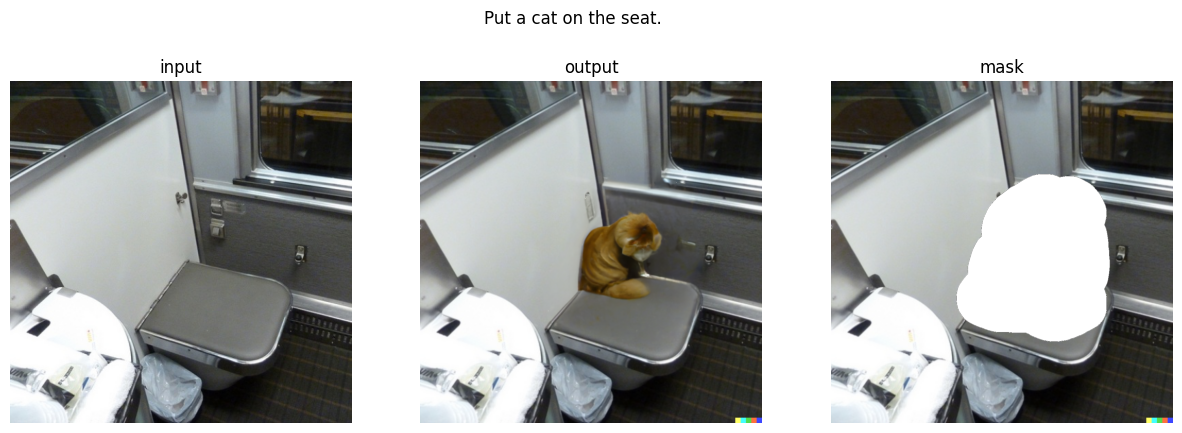

In [23]:
sample = mb_test["edit_sessions"]["242679"][0]
# plot before, after, and mask
fig ,ax = plt.subplots(1, 3, figsize=(15, 5))

# before
img = Image.open(os.path.join(DATA_DIR, f"images/{'242679'}", sample["input"]))
ax[0].imshow(img)
ax[0].set_title("input")


# after
img = Image.open(os.path.join(DATA_DIR, f"images/{'242679'}", sample["output"]))
ax[1].imshow(img)
ax[1].set_title("output")


# mask
img = Image.open(os.path.join(DATA_DIR, f"images/{'242679'}", sample["mask"]))
ax[2].imshow(img)
ax[2].set_title("mask")

for sax in ax:
    sax.axis("off")

fig.suptitle(sample["instruction"])

plt.show()


In [25]:
mb_test.keys()

dict_keys(['edit_sessions', 'edit_turns', 'global_descriptions', 'local_descriptions'])

In [26]:
mb_test["edit_turns"]

[{'input': '242679-input.png',
  'mask': '242679-mask1.png',
  'output': '242679-output1.png',
  'instruction': 'Put a cat on the seat.'},
 {'input': '368667-input.png',
  'mask': '368667-mask1.png',
  'output': '368667-output1.png',
  'instruction': 'Have there be a stream running through the field'},
 {'input': '368667-output1.png',
  'mask': '368667-mask2.png',
  'output': '368667-output2.png',
  'instruction': 'Add a giraffe in the field'},
 {'input': '368667-output2.png',
  'mask': '368667-mask3.png',
  'output': '368667-output3.png',
  'instruction': 'Add a supernova explosion in the sky'},
 {'input': '385042-input.png',
  'mask': '385042-mask1.png',
  'output': '385042-output1.png',
  'instruction': 'Make the hydrant all white.'},
 {'input': '385042-output1.png',
  'mask': '385042-mask2.png',
  'output': '385042-output2.png',
  'instruction': 'Put the hydrant on asphalt.'},
 {'input': '385042-output2.png',
  'mask': '385042-mask3.png',
  'output': '385042-output3.png',
  'instru

In [28]:
len(mb_test["edit_sessions"])

535

In [27]:
len(mb_test["edit_turns"])

1053

In [29]:
class EditTurn:

    def __init__(self, sample):
        self.image_id = sample["input"].split("-")[0]
        self._input = sample["input"]
        self._output = sample["output"]
        self._mask = sample["mask"]
        self._instruction = sample["instruction"]

    def plot(self):
        fig ,ax = plt.subplots(1, 3, figsize=(15, 5))

        # before
        img = Image.open(os.path.join(DATA_DIR, f"images/{self.image_id}", self._input))
        ax[0].imshow(img)
        ax[0].set_title("input")


        # after
        img = Image.open(os.path.join(DATA_DIR, f"images/{self.image_id}", self._output))
        ax[1].imshow(img)
        ax[1].set_title("output")


        # mask
        img = Image.open(os.path.join(DATA_DIR, f"images/{self.image_id}", self._mask))
        ax[2].imshow(img)
        ax[2].set_title("mask")

        for sax in ax:
            sax.axis("off")

        fig.suptitle(self._instruction)

        plt.show()

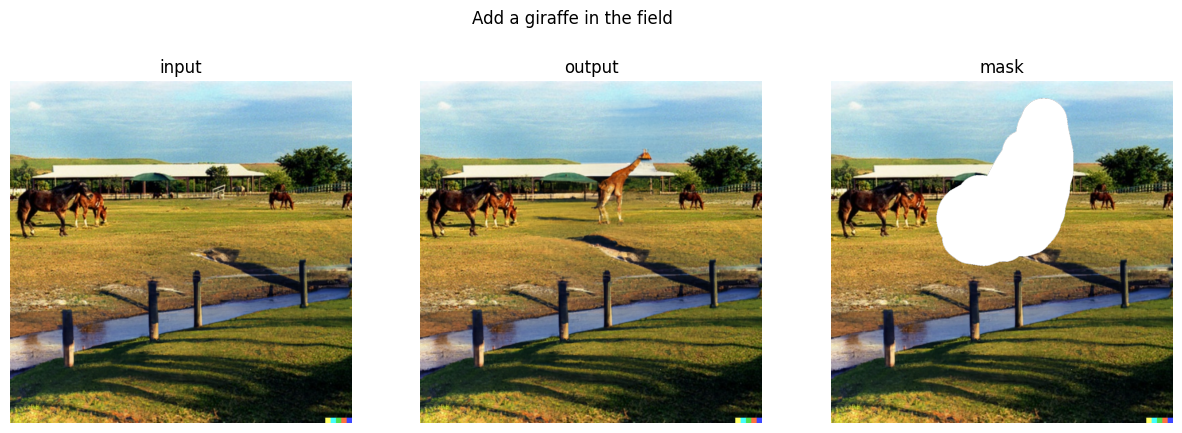

In [33]:
EditTurn(mb_test["edit_turns"][2]).plot()

In [42]:
from tqdm import tqdm

class MBDataset:

    def __init__(self, data_dir):
        self.data_dir = data_dir

        # load edit turns
        with open(os.path.join(data_dir, "edit_turns.json"), "r") as f:
            self.edit_turns = json.load(f)

        self.edit_turns = [EditTurn(sample) for sample in tqdm(self.edit_turns)]          
        
    def __len__(self):
        return len(self.edit_turns)
    
    def __getitem__(self, idx):
        return self.edit_turns[idx]
    
    def get_instructions(self):
        return [edit_turn._instruction for edit_turn in self.edit_turns]

In [43]:
ds = MBDataset(DATA_DIR)

100%|██████████| 1053/1053 [00:00<00:00, 1466335.36it/s]


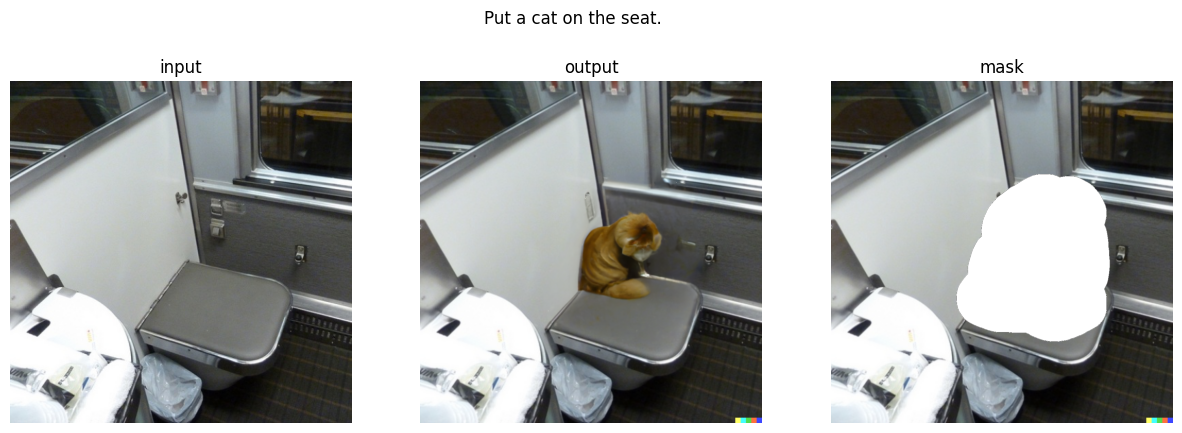

In [44]:
ds[0].plot()

In [45]:
_inst = ds.get_instructions()

In [48]:
import pandas as pd

In [49]:
text = pd.DataFrame(_inst, columns=["instruction"])

In [52]:
text["coloring"] = text.instruction.str.contains("color")

In [53]:
text["coloring"].value_counts()

coloring
False    1051
True        2
Name: count, dtype: int64

In [56]:
text.instruction.values.tolist()

['Put a cat on the seat.',
 'Have there be a stream running through the field',
 'Add a giraffe in the field',
 'Add a supernova explosion in the sky',
 'Make the hydrant all white.',
 'Put the hydrant on asphalt.',
 'Add a leashed dog to the hydrant.',
 'Put down the seat.',
 'Put a frog in the toilet.',
 'Repair the floor.',
 'let the laptop screen be blank',
 'let the chair be red',
 'let the desktop be black',
 'change the bright lime green curtains to white curtains',
 'change the bed to a bean bag',
 'let the table be wooden',
 'What if the horse was using a hat?',
 "Let's add birds to the sky",
 'Remove the man.',
 'Make the woman obese.',
 'Give the woman a helmet.',
 'Let a boy ski.',
 'put banana shaped candles in the candle holder',
 'let the player catch a ball',
 'Have there be a mermaid in the picture on the wall',
 'Have the mermaid be reading a book',
 'Have there be a lobster on the bed',
 'Remove the car in front of the bus.',
 'Put a small cat on top of the bus.',
 '

In [58]:
mb_test["global_descriptions"]

{'242679': {'242679-input.png': 'A seat under a mirror onboard a train, next to a cluttered counter.',
  '242679-output1.png': 'A cat lounges on a seat under a mirror onboard a train, next to a cluttered counter.'},
 '368667': {'368667-input.png': 'A couple of horses in a field at a ranch.',
  '368667-output1.png': 'Horses grazing by a stream at a ranch.',
  '368667-output2.png': 'Horses grazing by a stream at a ranch with a giraffe in the field.',
  '368667-output3.png': 'Horses grazing by a stream at a ranch with a giraffe in the field under a supernova explosion in the sky.'},
 '385042': {'385042-input.png': 'A black and white fire hydrant stands on a brick sidewalk.',
  '385042-output1.png': 'A white fire hydrant stands on a brick sidewalk.',
  '385042-output2.png': 'A white fire hydrant stands on an asphalt street.',
  '385042-output3.png': 'A leashed dog stands next to a white fire hydrant on an asphalt street.'},
 '483348': {'483348-input.png': 'A bathroom stall that is made of 